<a href="https://colab.research.google.com/github/brunotagoncalves/bimbo-compassers/blob/main/kaggle_api_3st_read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook para Download e Leitura Inicial de Arquivos 


1) Instalação e Download de Arquivos Kaggle

In [1]:
# Podem  ocorrrer falhas de instalação como lxml, mas isso não atrapalha o restante do código
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 4.2MB 40.6MB/s 
     |████████████████████████████████| 112kB 52.7MB/s 
     |████████████████████████████████| 143kB 51.2MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-6o6z499z/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-6o6z499z/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-tru4607c/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [2]:
# Alterando arquivo de config do Kaggle com dados pessoais https://www.kaggle.com/"username"/account  crie um token pessoal no botão "create new api token"
!mkdir ~/.kaggle
!echo '{"username":"bruno9tg","key":"656f29061b3fcda2f8c1541f3492f24d"}' > ../root/.kaggle/kaggle.json

In [3]:
#utiliza api kaggle para realizar download
#!kaggle competitions download -c grupo-bimbo-inventory-demand
!kaggle competitions download -p data/ grupo-bimbo-inventory-demand

  0% 0.00/31.5k [00:00<?, ?B/s]
100% 31.5k/31.5k [00:00<00:00, 48.7MB/s]
  0% 0.00/6.35k [00:00<?, ?B/s]
100% 6.35k/6.35k [00:00<00:00, 6.36MB/s]
 81% 12.0M/14.8M [00:00<00:00, 35.4MB/s]
100% 14.8M/14.8M [00:00<00:00, 49.3MB/s]
 85% 5.00M/5.87M [00:00<00:00, 18.1MB/s]
100% 5.87M/5.87M [00:00<00:00, 19.6MB/s]
 98% 365M/373M [00:03<00:00, 144MB/s]
100% 373M/373M [00:03<00:00, 109MB/s]
 87% 75.0M/85.8M [00:00<00:00, 77.3MB/s]
100% 85.8M/85.8M [00:00<00:00, 106MB/s] 


2) Leitura básica dos arquivos

In [2]:
import pandas as pd 

In [3]:
!ls data/

cliente_tabla.csv	sample_submission.csv.zip  test.csv.zip
cliente_tabla.csv.zip	tabelao			   town_state.csv
producto_tabla.csv	tabelao_lag		   town_state.csv.zip
producto_tabla.csv.zip	tabelao_sample		   train.csv
sample_submission.csv	test.csv		   train.csv.zip


In [4]:
pd.read_csv('data/cliente_tabla.csv.zip').head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


In [5]:
pd.read_csv('data/producto_tabla.csv.zip').head()

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [6]:
pd.read_csv('data/sample_submission.csv.zip').head()

,id,Demanda_uni_equil
0,0,7
1,1,7
2,2,7
3,3,7
4,4,7


In [7]:
pd.read_csv('data/test.csv.zip').head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [8]:
pd.read_csv('data/test.csv.zip').groupby('Semana').count()

,id,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
Semana,,,,,,
10,3538385,3538385,3538385,3538385,3538385,3538385
11,3460866,3460866,3460866,3460866,3460866,3460866


In [9]:
pd.read_csv('data/town_state.csv.zip').head()

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."


In [10]:
# Para os dados de treino o volume já excede a memoria do Colab usar a função iterator se faz necessário.
sample_train = pd.read_csv('data/train.csv.zip', nrows=1000)
sample_train

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
995,3,1110,7,3303,1453543,1250,25,191.00,0,0.0,25
996,3,1110,7,3303,1453543,1309,6,40.56,0,0.0,6
997,3,1110,7,3303,1453543,3270,1,10.47,0,0.0,1
998,3,1110,7,3303,1453543,4270,2,16.76,0,0.0,2


3) Instalação de Leitura com SPARK

In [11]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget http://www-eu.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz 
!wget -P spark_tgz/ http://www-eu.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz 

--2021-07-07 15:11:11--  http://www-eu.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
Resolving www-eu.apache.org (www-eu.apache.org)... 95.216.26.30, 2a01:4f9:2a:1a61::2
Connecting to www-eu.apache.org (www-eu.apache.org)|95.216.26.30|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz [following]
--2021-07-07 15:11:12--  https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.209.10, 135.181.214.104, 88.99.95.219, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.209.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235899716 (225M) [application/x-gzip]
Saving to: ‘spark_tgz/spark-2.4.8-bin-hadoop2.7.tgz.1’

spark-2.4.8-bin-had 100%[===================>] 224.97M  18.0MB/s    in 14s     

2021-07-07 15:11:26 (16.3 MB/s) - ‘spark_tgz/spa

In [12]:
!tar -xf spark_tgz/spark-2.4.8-bin-hadoop2.7.tgz -C spark_tgz/
!pip install -q findspark
!pip install -q pyspark

In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark_tgz/spark-2.4.8-bin-hadoop2.7"

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [15]:
!unzip 'data/*.zip' -d 'data/'

Archive:  data/cliente_tabla.csv.zip
replace data/cliente_tabla.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [18]:
df = spark.read.format('csv').option("header", "True").load("data/train.csv")

In [19]:
%%time
df.count()

CPU times: user 179 ms, sys: 21.6 ms, total: 201 ms
Wall time: 37.2 s


74180464

In [20]:
g_df_Semana= df.groupBy('Semana').count().toPandas()

In [21]:
g_df_Semana.loc[:,'percent'] = g_df_Semana['count']/g_df_Semana['count'].sum()

In [22]:
g_df_Semana.sort_values('Semana')

,Semana,count,percent
1,3,11165207,0.150514
6,4,11009593,0.148416
3,5,10615397,0.143102
4,6,10191837,0.137392
0,7,10382849,0.139967
2,8,10406868,0.140291
5,9,10408713,0.140316


# Relacionando tabelas 

In [23]:
!ls data/*.csv

data/cliente_tabla.csv	 data/sample_submission.csv  data/town_state.csv
data/producto_tabla.csv  data/test.csv		     data/train.csv


In [24]:
spark.read.format('csv').option("header", "True").load("data/cliente_tabla.csv").createOrReplaceTempView('cliente_tabla') 
spark.read.format('csv').option("header", "True").load("data/sample_submission.csv").createOrReplaceTempView('sample_submission') 
spark.read.format('csv').option("header", "True").load("data/town_state.csv").createOrReplaceTempView('town_state') 
spark.read.format('csv').option("header", "True").load("data/producto_tabla.csv").createOrReplaceTempView('producto_tabla') 
spark.read.format('csv').option("header", "True").load("data/test.csv").createOrReplaceTempView('test') 
spark.read.format('csv').option("header", "True").load("data/train.csv").createOrReplaceTempView('train') 

In [25]:
df = spark.sql("""
SELECT train.*
--  , cliente_tabla.NombreCliente 
  , producto_tabla.NombreProducto
  , town_state.Town
  , town_state.State
FROM train
--LEFT JOIN cliente_tabla 
--  on train.Cliente_ID = cliente_tabla.Cliente_ID
LEFT JOIN producto_tabla
  on train.Producto_ID = producto_tabla.Producto_ID
LEFT JOIN town_state
  on train.Agencia_ID = town_state.Agencia_ID  
""")
#.write.mode('overwrite').format('parquet').save('data/tabelao/')

In [26]:
df.write.partitionBy(["Agencia_ID"]).mode('overwrite').format('parquet').save('data/tabelao/')

In [3]:
df = spark.read.format('parquet').load('data/tabelao/')

In [4]:
%%time
df.count()

CPU times: user 48.8 ms, sys: 10.9 ms, total: 59.7 ms
Wall time: 9.57 s


74180464

In [5]:
df.limit(5).toPandas()

,Semana,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreProducto,Town,State,Agencia_ID
0,3,1,2135,93492,43058,1,9.35,0,0.0,1,Sponch 8p 120g MTB MLA 43058,2309 NORTE,JALISCO,1911
1,3,1,1007,90938,1109,1,15.01,0,0.0,1,Pan Blanco Chico 360g BIM 1109,2309 NORTE,JALISCO,1911
2,3,1,2135,93567,30549,2,10.76,0,0.0,2,Suavicremas Chocolate 84g MTA MLA 30549,2309 NORTE,JALISCO,1911
3,3,1,1007,90938,1125,8,76.8,0,0.0,8,Tortillinas 10p 255g TR 1125,2309 NORTE,JALISCO,1911
4,3,1,2135,93567,30572,7,43.75,0,0.0,7,Barritas Fresa 67g Prom MTB MLA 30572,2309 NORTE,JALISCO,1911


In [6]:
df.createOrReplaceTempView('tabelao')

In [7]:
df.filter("Semana=9").sample(fraction=.01).createOrReplaceTempView('tabelao_9')

In [8]:
df.filter("Semana=9").count()

10408713

In [9]:
df = spark.sql("""
SELECT tabelao.*
FROM tabelao_9 
inner join tabelao
  on tabelao.Cliente_ID = tabelao_9.Cliente_ID
  and tabelao.Canal_ID = tabelao_9.Canal_ID
  and tabelao.Producto_ID = tabelao_9.Producto_ID
  and tabelao.Agencia_ID = tabelao_9.Agencia_ID
""")


In [10]:
df.write.mode('overwrite').format('parquet').save('data/tabelao_sample/')


In [11]:
df = spark.read.format('parquet').load('data/tabelao_sample/')
df.createOrReplaceTempView('tabelao_sample')

In [12]:
df.limit(10).toPandas()

,Semana,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreProducto,Town,State,Agencia_ID
0,9,1,900,4711525,43316,13,105.95,0,0.0,13,Submarinos Vainilla 3p 105g SP MTA MLA 43316,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347
1,9,1,1051,198271,1150,8,111.68,0,0.0,8,Medias Noches 8p 340g BIM 1150,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347
2,9,1,1051,866477,1146,3,64.17,0,0.0,3,Pan Integral 675g BIM 1146,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347
3,9,1,1052,419215,3631,25,408.75,0,0.0,25,Pan Integral 370g BIM 3631,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347
4,9,1,1052,2477352,31392,3,66.66,0,0.0,3,Pan Doble Fibra 640g BIM 31392,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347
5,9,1,1053,48598,1146,18,385.02,2,42.78,16,Pan Integral 675g BIM 1146,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347
6,9,1,1053,134023,4767,9,133.11,0,0.0,9,Tostado Doble Fibra 250g Cj BIM 4767,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347
7,9,1,1053,134928,1109,3,45.03,0,0.0,3,Pan Blanco Chico 360g BIM 1109,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347
8,9,1,1055,190183,36318,11,144.32,8,104.96,3,Pan Deli Avena 4p 293g BIM 36318,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347
9,9,1,1055,416166,1146,2,42.78,0,0.0,2,Pan Integral 675g BIM 1146,2251 AGUASCALIENTES NORTE,AGUASCALIENTES,1347


In [13]:
df.count()

437166

In [14]:
spark.sql("""
SELECT *
  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) SUM_Town_Prod_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) AVG_Town_Prod_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) MIN_Town_Prod_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) MAX_Town_Prod_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) SUM_Town_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) AVG_Town_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) MIN_Town_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) MAX_Town_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY State) SUM_State_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY State) AVG_State_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY State) MIN_State_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY State) MAX_State_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) SUM_State_Prod_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) AVG_State_Prod_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) MIN_State_Prod_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) MAX_State_Prod_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) SUM_Prod_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) AVG_Prod_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) MIN_Prod_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) MAX_Prod_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) SUM_Cliente_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) AVG_Cliente_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) MIN_Cliente_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) MAX_Cliente_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) SUM_Cliente_Prod_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) AVG_Cliente_Prod_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) MIN_Cliente_Prod_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) MAX_Cliente_Prod_Demanda_uni_equil
  
  ,LAG(Demanda_uni_equil,1) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_1_Cliente_Prod_Demanda_uni_equil
  ,LAG(Demanda_uni_equil,2) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_2_Cliente_Prod_Demanda_uni_equil
  ,LAG(Demanda_uni_equil,3) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_3_Cliente_Prod_Demanda_uni_equil
  ,LAG(Demanda_uni_equil,4) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_4_Cliente_Prod_Demanda_uni_equil
  ,LAG(Demanda_uni_equil,5) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_5_Cliente_Prod_Demanda_uni_equil
 
FROM tabelao_sample
--where Agencia_ID <= 2000
--ORDER BY Semana, Producto_ID
""").filter('Semana>=8').write.mode('overwrite').format('parquet').save('data/tabelao_lag/')

In [16]:
df = spark.read.format('parquet').load('data/tabelao_lag/')
df.count() # 74180464?

178338

In [17]:
df.toPandas().to_csv('df_sample.csv')

In [20]:
df.limit(10).toPandas()

,Semana,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreProducto,Town,State,Agencia_ID,SUM_Town_Prod_Demanda_uni_equil,AVG_Town_Prod_Demanda_uni_equil,MIN_Town_Prod_Demanda_uni_equil,MAX_Town_Prod_Demanda_uni_equil,SUM_Town_Demanda_uni_equil,AVG_Town_Demanda_uni_equil,MIN_Town_Demanda_uni_equil,MAX_Town_Demanda_uni_equil,SUM_State_Demanda_uni_equil,AVG_State_Demanda_uni_equil,MIN_State_Demanda_uni_equil,MAX_State_Demanda_uni_equil,SUM_State_Prod_Demanda_uni_equil,AVG_State_Prod_Demanda_uni_equil,MIN_State_Prod_Demanda_uni_equil,MAX_State_Prod_Demanda_uni_equil,SUM_Prod_Demanda_uni_equil,AVG_Prod_Demanda_uni_equil,MIN_Prod_Demanda_uni_equil,MAX_Prod_Demanda_uni_equil,SUM_Cliente_Demanda_uni_equil,AVG_Cliente_Demanda_uni_equil,MIN_Cliente_Demanda_uni_equil,MAX_Cliente_Demanda_uni_equil,SUM_Cliente_Prod_Demanda_uni_equil,AVG_Cliente_Prod_Demanda_uni_equil,MIN_Cliente_Prod_Demanda_uni_equil,MAX_Cliente_Prod_Demanda_uni_equil,LAG_1_Cliente_Prod_Demanda_uni_equil,LAG_2_Cliente_Prod_Demanda_uni_equil,LAG_3_Cliente_Prod_Demanda_uni_equil,LAG_4_Cliente_Prod_Demanda_uni_equil,LAG_5_Cliente_Prod_Demanda_uni_equil
0,8,7,3309,319560,47336,36,446.4,0,0.0,36,Medias Noches FS 8p 340g BIM 47336,2008 AG. LAGO FILT,"MÉXICO, D.F.",1110,604.0,28.761905,1,60,3759.0,10.864162,0,9,906145.0,17.471560,0,997,1718.0,16.519231,0,9,5897.0,18.088957,0,96,322.0,46.000000,30,60,322.0,46.000000,30,60,40,60,49,52,55
1,9,7,3309,319560,47336,30,372.0,0,0.0,30,Medias Noches FS 8p 340g BIM 47336,2008 AG. LAGO FILT,"MÉXICO, D.F.",1110,604.0,28.761905,1,60,3759.0,10.864162,0,9,906145.0,17.471560,0,997,1718.0,16.519231,0,9,5897.0,18.088957,0,96,322.0,46.000000,30,60,322.0,46.000000,30,60,36,40,60,49,52
2,8,7,3302,817243,47336,40,496.0,0,0.0,40,Medias Noches FS 8p 340g BIM 47336,2008 AG. LAGO FILT,"MÉXICO, D.F.",1110,604.0,28.761905,1,60,3759.0,10.864162,0,9,906145.0,17.471560,0,997,1718.0,16.519231,0,9,5897.0,18.088957,0,96,257.0,36.714286,14,48,257.0,36.714286,14,48,40,40,48,35,14
3,9,7,3302,817243,47336,40,496.0,0,0.0,40,Medias Noches FS 8p 340g BIM 47336,2008 AG. LAGO FILT,"MÉXICO, D.F.",1110,604.0,28.761905,1,60,3759.0,10.864162,0,9,906145.0,17.471560,0,997,1718.0,16.519231,0,9,5897.0,18.088957,0,96,257.0,36.714286,14,48,257.0,36.714286,14,48,40,40,40,48,35
4,8,7,3305,134624,47336,4,49.6,0,0.0,4,Medias Noches FS 8p 340g BIM 47336,2008 AG. LAGO FILT,"MÉXICO, D.F.",1110,604.0,28.761905,1,60,3759.0,10.864162,0,9,906145.0,17.471560,0,997,1718.0,16.519231,0,9,5897.0,18.088957,0,96,25.0,3.571429,1,6,25.0,3.571429,1,6,4,3,3,1,6
5,9,7,3305,134624,47336,4,49.6,0,0.0,4,Medias Noches FS 8p 340g BIM 47336,2008 AG. LAGO FILT,"MÉXICO, D.F.",1110,604.0,28.761905,1,60,3759.0,10.864162,0,9,906145.0,17.471560,0,997,1718.0,16.519231,0,9,5897.0,18.088957,0,96,25.0,3.571429,1,6,25.0,3.571429,1,6,4,4,3,3,1
6,9,1,1412,4231319,31423,5,53.45,0,0.0,5,Donas Azucar Tubo 10p 158g BIM 31423,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,1112,71.0,4.176471,1,9,15197.0,6.778323,0,96,1207835.0,17.774826,0,99,2739.0,3.467089,0,9,9895.0,3.497702,0,9,14.0,4.666667,2,7,14.0,4.666667,2,7,2,7,None,None,None
7,8,1,1402,327762,31423,9,96.21,0,0.0,9,Donas Azucar Tubo 10p 158g BIM 31423,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,1112,71.0,4.176471,1,9,15197.0,6.778323,0,96,1207835.0,17.774826,0,99,2739.0,3.467089,0,9,9895.0,3.497702,0,9,58.0,5.800000,3,9,43.0,6.142857,3,9,3,6,8,9,3
8,9,1,1402,327762,31423,5,53.45,0,0.0,5,Donas Azucar Tubo 10p 158g BIM 31423,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,1112,71.0,4.176471,1,9,15197.0,6.778323,0,96,1207835.0,17.774826,0,99,2739.0,3.467089,0,9,9895.0,3.497702,0,9,58.0,5.800000,3,9,43.0,6.142857,3,9,9,3,6,8,9
9,8,1,1423,4641133,31423,4,42.76,0,0.0,4,Donas Azucar Tubo 10p 158g BIM 31423,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,1112,71.0,4.176471,1,9,15197.0,6.778323,0,96,1207835.0,17.774826,0,99,2739.0,3.467089,0,9,9895.0,3.497702,0,9,23.0,2.300000,1,4,14.0,2.000000,1,4,1,1,2,3,2


In [29]:
import pandas as pd
df_sample = pd.read_csv('df_sample.csv',index_col=0)#df.toPandas()#.describe()

In [51]:
pd.set_option("display.max_columns", 500)

In [52]:
df_sample.groupby('Semana').describe().stack(0).T.unstack(1).unstack(0).T

AVG_Cliente_Demanda_uni_equil                                        \
                                 25%  50%       75%     count          max   
Semana                                                                       
8                           2.428571  4.4  8.857143   71990.0  2962.285714   
9                           2.000000  3.8  7.500000  106348.0  2962.285714   

                                 AVG_Cliente_Prod_Demanda_uni_equil       \
             mean  min       std                                25%  50%   
Semana                                                                     
8       12.054146  0.0  31.28354                           2.333333  4.2   
9        9.811900  0.0  26.70559                           2.000000  3.6   

                                                                    \
             75%     count          max       mean  min        std   
Semana                                                               
8       8.714286   71990.0  2962.285714  12.046790  0.0  35.166151   
9       7.250000  106348.0  2962.285714   9.716462  0.0  29.697210   

       AVG_Prod_Demanda_uni_equil                                             \
                              25%       50%        75%     count         max   
Semana                                                                         
8                        3.949367  6.635707  10.909320   71990.0  993.904762   
9                        3.897057  6.247770  10.572917  106348.0  993.904762   

                                  AVG_State_Demanda_uni_equil             \
             mean  min        std                         25%        50%   
Semana                                                                     
8       12.366657  0.0  27.333967                    9.041934  11.335000   
9       11.107191  0.0  23.416159                    9.041934  11.215035   

                                                                      \
             75%     count        max       mean       min       std   
Semana                                                                 
8       17.47156   71990.0  49.820151  12.932363  7.369736  5.134577   
9       17.47156  106348.0  49.820151  12.790652  7.369736  4.994396   

       AVG_State_Prod_Demanda_uni_equil                                \
                                    25%       50%       75%     count   
Semana                                                                  
8                              3.692308  5.687382  9.941860   71990.0   
9                              3.500000  5.428571  9.156584  106348.0   

                                               AVG_Town_Demanda_uni_equil  \
                max       mean  min        std                        25%   
Semana                                                                      
8       1484.571429  12.268441  0.0  30.453312                   6.098227   
9       1484.571429  10.702518  0.0  25.946836                   6.068390   

                                                                        \
             50%       75%     count          max       mean       min   
Semana                                                                   
8       6.997477  8.092857   71990.0  2962.285714  12.222637  4.239924   
9       6.904689  7.991180  106348.0  2962.285714  10.834358  3.666667   

                  AVG_Town_Prod_Demanda_uni_equil                      \
              std                             25%       50%       75%   
Semana                                                                  
8       27.118025                        3.153846  5.046512  9.150538   
9       22.977219                        2.925926  4.615385  8.212121   

                                                         Agencia_ID          \
           count          max       mean  min        std        25%     50%   
Semana                                                                        
8        71990.

In [53]:
cols = [i for i in df_sample.columns if i[-len('Demanda_uni_equil'):] in ['Demanda_uni_equil']]

In [54]:
df_sample.loc[:,cols].astype('float').describe().T

,count,mean,std,min,25%,50%,75%,max
Demanda_uni_equil,178338.0,10.586314,34.981262,0.000000,2.000000,4.000000,8.000000,3.456000e+03
SUM_Town_Prod_Demanda_uni_equil,178338.0,823.049272,4105.726886,0.000000,60.000000,174.000000,466.000000,1.144040e+05
AVG_Town_Prod_Demanda_uni_equil,178338.0,11.000797,31.188414,0.000000,3.000000,4.793388,8.581395,2.962286e+03
MIN_Town_Prod_Demanda_uni_equil,178338.0,5.128957,23.541602,0.000000,0.000000,1.000000,1.000000,1.680000e+03
MAX_Town_Prod_Demanda_uni_equil,178338.0,14.176188,37.678479,0.000000,6.000000,8.000000,9.000000,4.608000e+03
SUM_Town_Demanda_uni_equil,178338.0,17114.763769,29749.100370,44.000000,8739.000000,13178.000000,18352.000000,3.389420e+05
AVG_Town_Demanda_uni_equil,178338.0,11.394767,24.741633,3.666667,6.072636,6.941285,8.047619,2.962286e+03
MIN_Town_Demanda_uni_equil,178338.0,0.395278,7.064697,0.000000,0.000000,0.000000,0.000000,1.152000e+03
MAX_Town_Demanda_uni_equil,178338.0,50.516872,55.918047,6.000000,9.000000,9.000000,95.000000,4.608000e+03
SUM_State_Demanda_uni_equil,178338.0,417574.558165,418817.828328,14173.000000,101432.000000,201608.000000,906145.000000,1.207835e+06


In [59]:
df_sample.loc[:,cols].astype('float').corr()['Demanda_uni_equil'].sort_values(ascending=False)

Demanda_uni_equil                       1.000000
AVG_Cliente_Prod_Demanda_uni_equil      0.929533
AVG_Town_Prod_Demanda_uni_equil         0.903035
LAG_1_Cliente_Prod_Demanda_uni_equil    0.861263
LAG_2_Cliente_Prod_Demanda_uni_equil    0.860884
LAG_4_Cliente_Prod_Demanda_uni_equil    0.857081
LAG_3_Cliente_Prod_Demanda_uni_equil    0.856810
LAG_5_Cliente_Prod_Demanda_uni_equil    0.854672
AVG_Cliente_Demanda_uni_equil           0.815551
MAX_Cliente_Prod_Demanda_uni_equil      0.804762
AVG_State_Prod_Demanda_uni_equil        0.804370
MIN_Cliente_Prod_Demanda_uni_equil      0.756008
MAX_Town_Prod_Demanda_uni_equil         0.737467
AVG_Prod_Demanda_uni_equil              0.725574
MIN_Town_Prod_Demanda_uni_equil         0.712155
AVG_Town_Demanda_uni_equil              0.700876
SUM_Town_Prod_Demanda_uni_equil         0.648090
SUM_Cliente_Prod_Demanda_uni_equil      0.647675
MAX_Cliente_Demanda_uni_equil           0.623217
MIN_State_Prod_Demanda_uni_equil        0.569706
SUM_Cliente_Demanda_

In [64]:
df_sample.MIN_State_Demanda_uni_equil.describe()

count    178338.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: MIN_State_Demanda_uni_equil, dtype: float64

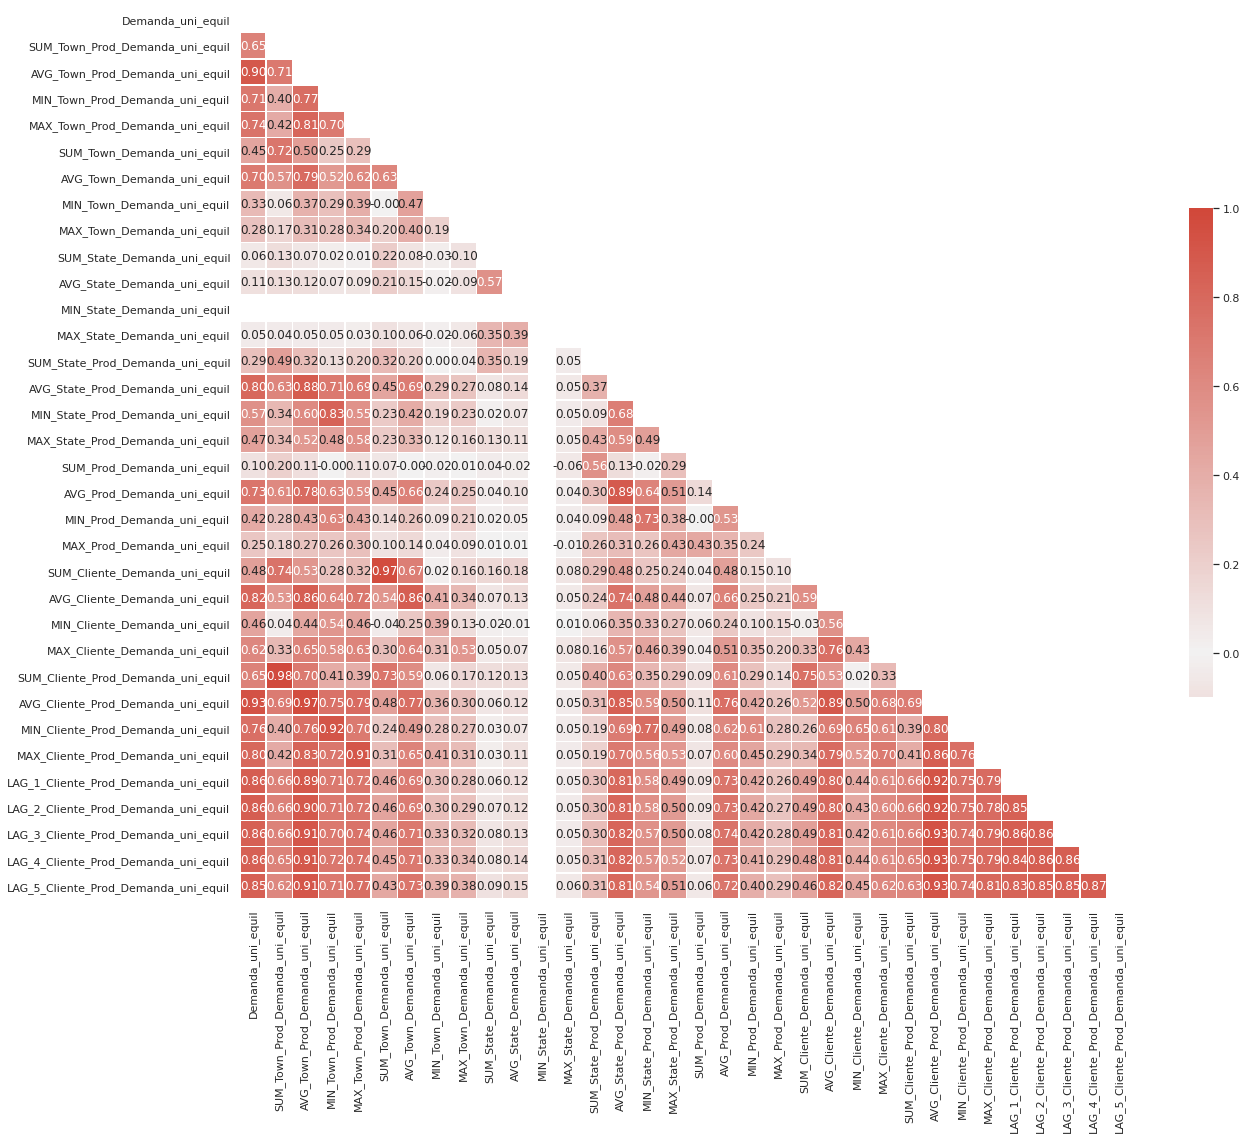

In [65]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_sample.loc[:,cols].astype('float').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(15, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})